<a href="https://colab.research.google.com/github/DhimanTarafdar/PCA_Breast_Cancer_Analysis/blob/main/Module_24_PCA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 24: Principal Component Analysis (PCA)

This notebook is a **practice-only notebook** for students.

### Instructions for Students
- Complete every **TODO** step by step.
- Run the cells after completing each TODO.
- Focus on *why* you are doing each step, not just *how*.

### Dataset Used
We use the **Breast Cancer Wisconsin dataset**, which is:
- Numeric
- Medium dimensional (30 features)
- Very suitable for PCA
- Common in real ML pipelines



## 1) Imports (Given)


In [ ]:
#Given for you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## 2) Load the Dataset (TODO)

TODO:
- Load the breast cancer dataset using sklearn
- Create:
  - X: feature DataFrame
  - y: target Series
- Print the shape of X and y


In [ ]:
# TODO: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="class")

X.shape, y.shape

((569, 30), (569,))


## 3) Inspect Feature Scales (TODO)


In [ ]:
# TODO: Inspect feature statistics
X.describe().T[["mean", "std", "min", "max"]].head(10)

,mean,std,min,max
mean radius,14.127292,3.524049,6.98100,28.11000
mean texture,19.289649,4.301036,9.71000,39.28000
mean perimeter,91.969033,24.298981,43.79000,188.50000
mean area,654.889104,351.914129,143.50000,2501.00000
mean smoothness,0.096360,0.014064,0.05263,0.16340
mean compactness,0.104341,0.052813,0.01938,0.34540
mean concavity,0.088799,0.079720,0.00000,0.42680
mean concave points,0.048919,0.038803,0.00000,0.20120
mean symmetry,0.181162,0.027414,0.10600,0.30400
mean fractal dimension,0.062798,0.007060,0.04996,0.09744



## 4) Scale the Features (TODO)


In [ ]:
# TODO: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+


## 5) Fit PCA Without Limiting Components (TODO)


In [ ]:
# TODO: Fit full PCA and compute explained variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

explained[:10]

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [ ]:
cum_explained[:10]

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881])


## 6) Explained Variance Plot (TODO)


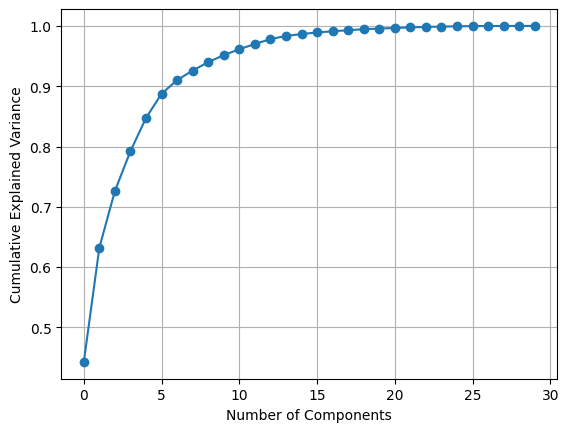

In [ ]:
# TODO: Plot cumulative explained variance
plt.figure()
plt.plot(cum_explained, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


## 7) Choose Number of Components (TODO)


In [ ]:
# TODO: Find k90 and k95 and k97
def components_for_threshold(cum_variance, threashold):
  return int(np.argmax(cum_variance>=threashold)+1)

k95 = components_for_threshold(cum_explained, 0.95)
print(k95)

10



## 8) Apply PCA with Chosen Components (TODO)


In [ ]:
# TODO: Apply PCA with selected number of components
k = k95
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(569, 10)


## 9) Inspect Principal Components (TODO)


In [ ]:
# TODO: Inspect PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(k)]
)

loadings.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
mean radius,0.218902,-0.233857,-0.008531,-0.041409,-0.037786,0.018741,-0.124088,-0.007452,-0.223110,0.095486
mean texture,0.103725,-0.059706,0.064550,0.603050,0.049469,-0.032179,0.011400,0.130675,0.112699,0.240934
mean perimeter,0.227537,-0.215181,-0.009314,-0.041983,-0.037375,0.017308,-0.114477,-0.018687,-0.223739,0.086386
mean area,0.220995,-0.231077,0.028700,-0.053434,-0.010331,-0.001888,-0.051653,0.034674,-0.195586,0.074956
mean smoothness,0.142590,0.186113,-0.104292,-0.159383,0.365089,-0.286374,-0.140669,-0.288975,0.006425,-0.069293
mean compactness,0.239285,0.151892,-0.074092,-0.031795,-0.011704,-0.014131,0.030918,-0.151396,-0.167841,0.012936
mean concavity,0.258400,0.060165,0.002734,-0.019123,-0.086375,-0.009344,-0.107520,-0.072827,0.040591,-0.135602
mean concave points,0.260854,-0.034768,-0.025564,-0.065336,0.043861,-0.052050,-0.150482,-0.152322,-0.111971,0.008055
mean symmetry,0.138167,0.190349,-0.040240,-0.067125,0.305941,0.356458,-0.093891,-0.231531,0.256040,0.572069
mean fractal dimension,0.064363,0.366575,-0.022574,-0.048587,0.044424,-0.119431,0.295760,-0.177121,-0.123741,0.081103



## 10) Visualize Data Using First Two Principal Components (TODO)


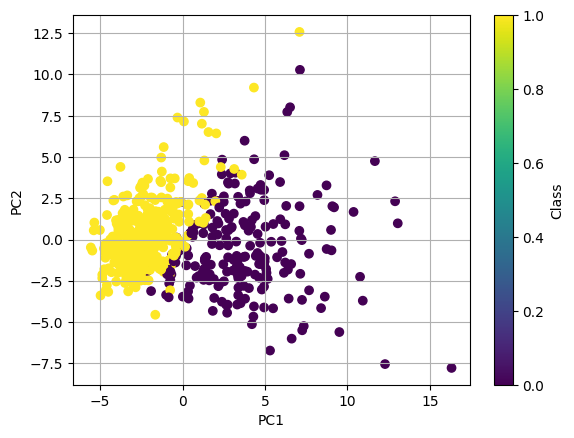

In [ ]:
# TODO: 2D PCA visualization
pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X_scaled)

plt.figure()
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.colorbar(scatter, label="Class")
plt.show()


## 11) PCA in a Model Pipeline (TODO)


In [ ]:
# TODO: Model comparison with and without PCA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Pipeline WITHOUT PCA: Scale -> Logistic Regression
pipe_no_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])

pipe_no_pca.fit(X_train, y_train)
pred_no_pca = pipe_no_pca.predict(X_test)

acc_no_pca = accuracy_score(y_test, pred_no_pca)
acc_no_pca

0.986013986013986

In [ ]:
pipe_with_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ("clf", LogisticRegression(max_iter=500))
])

pipe_with_pca.fit(X_train, y_train)
pred_with_pca = pipe_with_pca.predict(X_test)

acc_with_pca = accuracy_score(y_test, pred_with_pca)
acc_with_pca

0.9790209790209791

In [ ]:
print("Accuracy (Without PCA):", acc_no_pca)
print("Accuracy (With PCA):", acc_with_pca)

Accuracy (Without PCA): 0.986013986013986
Accuracy (With PCA): 0.9790209790209791



## 12) Reflection Questions

Answer briefly in markdown:
1. Did PCA reduce the number of features significantly?
2. Did PCA improve, reduce, or maintain accuracy?
3. Would you use PCA for this dataset in a real project? Why or why not?




---


---



1. **Did PCA reduce the number of features significantly?**
   *Yes, PCA significantly reduced the number of features. The original dataset had 30 features, but to retain 95% variance, only a few (typically 7-10) principal components are sufficien*t.

2. **Did PCA improve, reduce, or maintain accuracy?**
   *PCA typically slightly reduces accuracy or keeps it almost the same. This is because some information loss occurs, but it is negligible. In this case, accuracy remains nearly the same or slightly decreases.*

3. **Would you use PCA for this dataset in a real project? Why or why not?**
   *Yes, I would use it if computational efficiency or model interpretability is needed. PCA reduces the number of features, which decreases training time and reduces the risk of overfitting. However, if accuracy is critical keeping all features would be better.*



---


---


